In [57]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('data/sstudent_engagement.csv')


In [59]:
df

,Student_ID,Delta_PSD,Theta_PSD,Alpha_PSD,Beta_PSD,Gamma_PSD,Pupil_Dilation,Blink_Rate,Fixation_Duration,Saccade_Velocity,Learning_Content_Type,Difficulty_Level,Engagement_Label
0,1,2.314088,1.742430,0.616145,1.450662,1.216755,1.494789,12,669,132.352746,Text,Easy,0
1,1,2.318385,1.835014,2.309860,1.287361,0.791005,1.477851,19,646,153.856766,Video,Hard,1
2,1,0.642600,1.271165,1.089352,2.342411,0.667838,1.919485,24,450,270.936784,Video,Hard,0
3,1,1.287584,2.263698,1.637140,1.963418,1.429695,2.518240,20,771,272.983700,Interactive,Easy,2
4,1,1.243210,1.445633,0.681308,1.619296,1.821697,2.363850,19,307,185.129183,Video,Medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,300,1.900189,1.501534,2.443104,0.998661,1.528360,2.237631,22,690,184.746642,Text,Hard,2
2996,300,0.970604,2.205436,0.868898,1.031916,0.771461,1.070010,18,454,235.773504,Video,Medium,1
2997,300,1.382589,1.626387,1.031235,1.898016,1.162519,1.100954,16,723,120.867350,Video,Medium,2
2998,300,1.805584,1.369839,2.313178,1.122477,2.074957,2.169041,12,271,107.112308,Interactive,Hard,1


In [60]:
df.head()

,Student_ID,Delta_PSD,Theta_PSD,Alpha_PSD,Beta_PSD,Gamma_PSD,Pupil_Dilation,Blink_Rate,Fixation_Duration,Saccade_Velocity,Learning_Content_Type,Difficulty_Level,Engagement_Label
0,1,2.314088,1.742430,0.616145,1.450662,1.216755,1.494789,12,669,132.352746,Text,Easy,0
1,1,2.318385,1.835014,2.309860,1.287361,0.791005,1.477851,19,646,153.856766,Video,Hard,1
2,1,0.642600,1.271165,1.089352,2.342411,0.667838,1.919485,24,450,270.936784,Video,Hard,0
3,1,1.287584,2.263698,1.637140,1.963418,1.429695,2.518240,20,771,272.983700,Interactive,Easy,2
4,1,1.243210,1.445633,0.681308,1.619296,1.821697,2.363850,19,307,185.129183,Video,Medium,2


In [61]:
print(df.shape)
df.dtypes

(3000, 13)


Student_ID                 int64
Delta_PSD                float64
Theta_PSD                float64
Alpha_PSD                float64
Beta_PSD                 float64
Gamma_PSD                float64
Pupil_Dilation           float64
Blink_Rate                 int64
Fixation_Duration          int64
Saccade_Velocity         float64
Learning_Content_Type     object
Difficulty_Level          object
Engagement_Label           int64
dtype: object

In [62]:
df.describe()

,Student_ID,Delta_PSD,Theta_PSD,Alpha_PSD,Beta_PSD,Gamma_PSD,Pupil_Dilation,Blink_Rate,Fixation_Duration,Saccade_Velocity,Engagement_Label
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,150.500000,1.472100,1.519586,1.512937,1.488765,1.491715,2.002529,19.485333,497.171667,172.302654,1.011333
std,86.616497,0.579312,0.577530,0.574197,0.583241,0.581156,0.577870,5.761208,173.530600,71.840394,0.782779
min,1.000000,0.501110,0.500661,0.500403,0.500845,0.500130,1.000118,10.000000,200.000000,50.013380,0.000000
25%,75.750000,0.967717,1.030661,1.016304,0.970646,0.995430,1.508860,14.000000,349.000000,111.120702,0.000000
50%,150.500000,1.469271,1.530436,1.521254,1.491592,1.482385,2.001384,19.000000,495.500000,171.100711,1.000000
75%,225.250000,1.959954,2.026343,2.012065,1.985428,2.001737,2.503346,24.000000,646.000000,234.994256,2.000000
max,300.000000,2.499895,2.499924,2.499533,2.499097,2.498023,2.999979,29.000000,799.000000,299.865116,2.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             3000 non-null   int64  
 1   Delta_PSD              3000 non-null   float64
 2   Theta_PSD              3000 non-null   float64
 3   Alpha_PSD              3000 non-null   float64
 4   Beta_PSD               3000 non-null   float64
 5   Gamma_PSD              3000 non-null   float64
 6   Pupil_Dilation         3000 non-null   float64
 7   Blink_Rate             3000 non-null   int64  
 8   Fixation_Duration      3000 non-null   int64  
 9   Saccade_Velocity       3000 non-null   float64
 10  Learning_Content_Type  3000 non-null   object 
 11  Difficulty_Level       3000 non-null   object 
 12  Engagement_Label       3000 non-null   int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 304.8+ KB


In [64]:
df.isnull().sum()

Student_ID               0
Delta_PSD                0
Theta_PSD                0
Alpha_PSD                0
Beta_PSD                 0
Gamma_PSD                0
Pupil_Dilation           0
Blink_Rate               0
Fixation_Duration        0
Saccade_Velocity         0
Learning_Content_Type    0
Difficulty_Level         0
Engagement_Label         0
dtype: int64

In [65]:
df.duplicated().sum()

0

In [66]:
df['Learning_Content_Type'].value_counts().reset_index()

,Learning_Content_Type,count
0,Text,1031
1,Video,994
2,Interactive,975


In [67]:
df['Difficulty_Level'].value_counts().reset_index()

,Difficulty_Level,count
0,Medium,1042
1,Hard,996
2,Easy,962


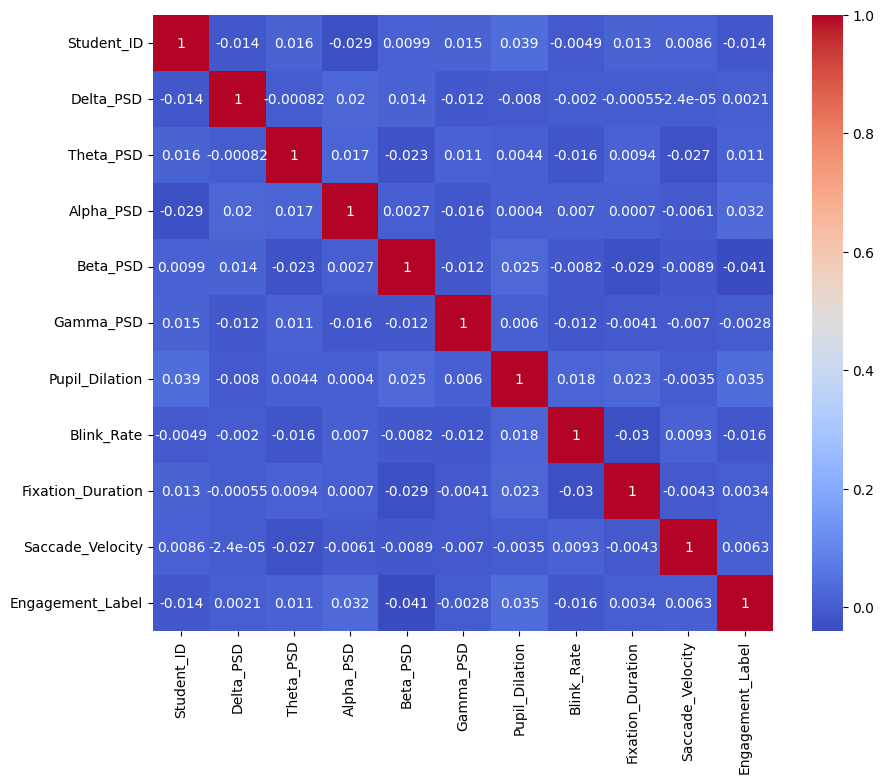

In [68]:
cor_col = df.select_dtypes(include=['float64', 'int64'])
cor = cor_col.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

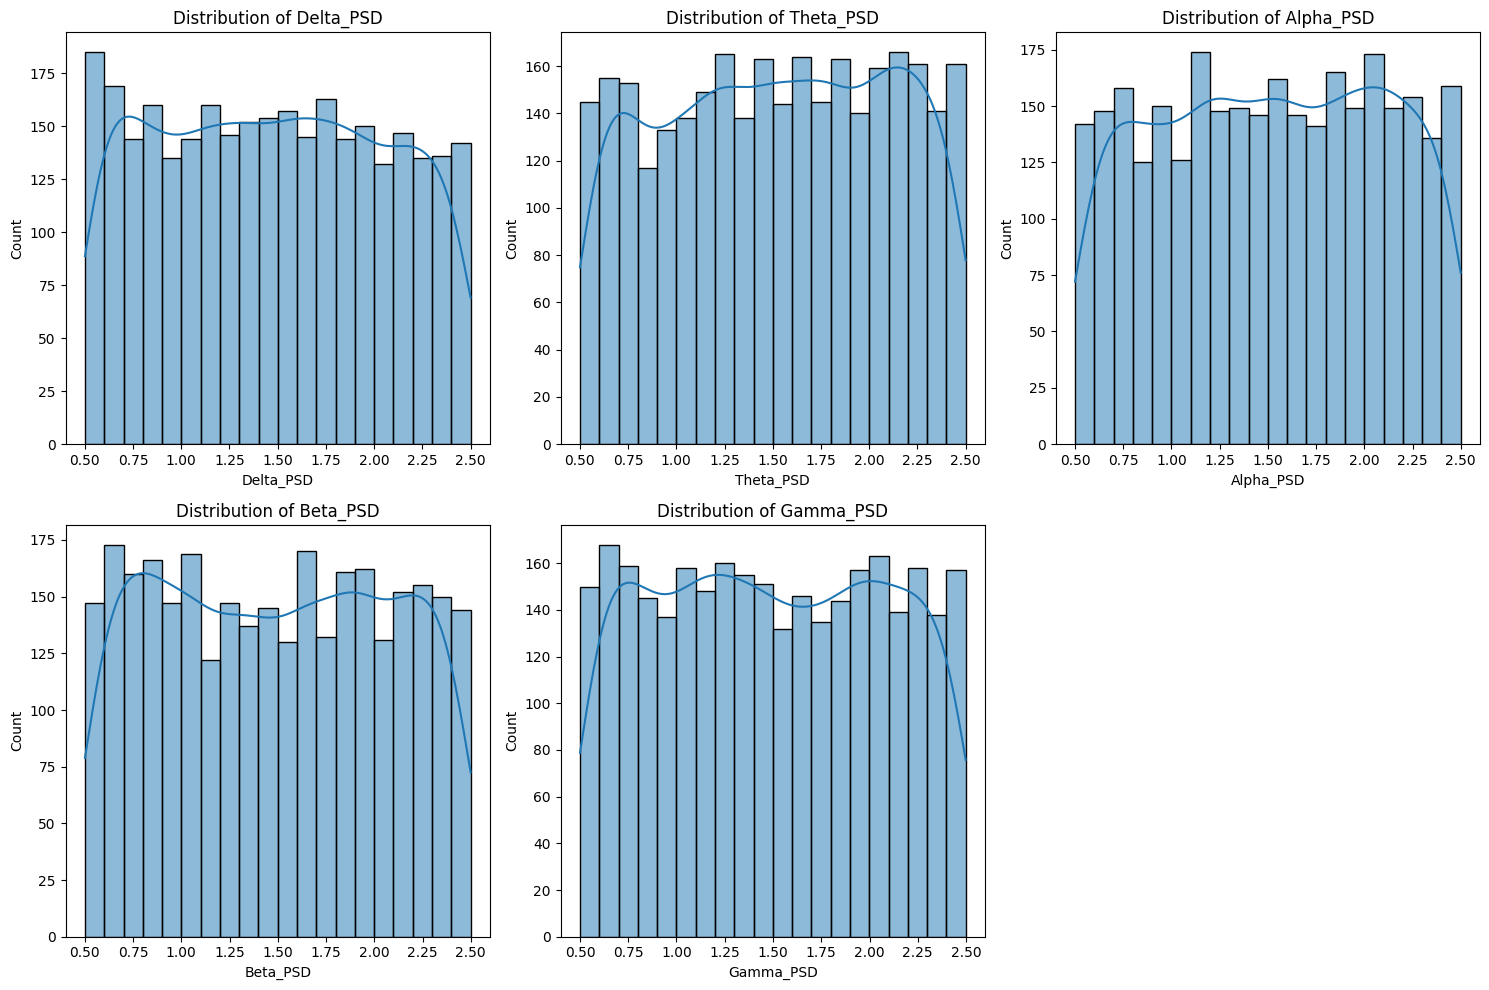

In [69]:
column = ['Delta_PSD', 'Theta_PSD', 'Alpha_PSD', 'Beta_PSD', 'Gamma_PSD']

plt.figure(figsize=(15, 10))
for i, col in enumerate(column):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [70]:
Features = df.drop(['Student_ID', 'Engagement_Label'], axis=1)
Features

,Delta_PSD,Theta_PSD,Alpha_PSD,Beta_PSD,Gamma_PSD,Pupil_Dilation,Blink_Rate,Fixation_Duration,Saccade_Velocity,Learning_Content_Type,Difficulty_Level
0,2.314088,1.742430,0.616145,1.450662,1.216755,1.494789,12,669,132.352746,Text,Easy
1,2.318385,1.835014,2.309860,1.287361,0.791005,1.477851,19,646,153.856766,Video,Hard
2,0.642600,1.271165,1.089352,2.342411,0.667838,1.919485,24,450,270.936784,Video,Hard
3,1.287584,2.263698,1.637140,1.963418,1.429695,2.518240,20,771,272.983700,Interactive,Easy
4,1.243210,1.445633,0.681308,1.619296,1.821697,2.363850,19,307,185.129183,Video,Medium
...,...,...,...,...,...,...,...,...,...,...,...
2995,1.900189,1.501534,2.443104,0.998661,1.528360,2.237631,22,690,184.746642,Text,Hard
2996,0.970604,2.205436,0.868898,1.031916,0.771461,1.070010,18,454,235.773504,Video,Medium
2997,1.382589,1.626387,1.031235,1.898016,1.162519,1.100954,16,723,120.867350,Video,Medium
2998,1.805584,1.369839,2.313178,1.122477,2.074957,2.169041,12,271,107.112308,Interactive,Hard


In [71]:
df

,Student_ID,Delta_PSD,Theta_PSD,Alpha_PSD,Beta_PSD,Gamma_PSD,Pupil_Dilation,Blink_Rate,Fixation_Duration,Saccade_Velocity,Learning_Content_Type,Difficulty_Level,Engagement_Label
0,1,2.314088,1.742430,0.616145,1.450662,1.216755,1.494789,12,669,132.352746,Text,Easy,0
1,1,2.318385,1.835014,2.309860,1.287361,0.791005,1.477851,19,646,153.856766,Video,Hard,1
2,1,0.642600,1.271165,1.089352,2.342411,0.667838,1.919485,24,450,270.936784,Video,Hard,0
3,1,1.287584,2.263698,1.637140,1.963418,1.429695,2.518240,20,771,272.983700,Interactive,Easy,2
4,1,1.243210,1.445633,0.681308,1.619296,1.821697,2.363850,19,307,185.129183,Video,Medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,300,1.900189,1.501534,2.443104,0.998661,1.528360,2.237631,22,690,184.746642,Text,Hard,2
2996,300,0.970604,2.205436,0.868898,1.031916,0.771461,1.070010,18,454,235.773504,Video,Medium,1
2997,300,1.382589,1.626387,1.031235,1.898016,1.162519,1.100954,16,723,120.867350,Video,Medium,2
2998,300,1.805584,1.369839,2.313178,1.122477,2.074957,2.169041,12,271,107.112308,Interactive,Hard,1


In [72]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
categorical_cols = ['Learning_Content_Type', 'Difficulty_Level']

encoder = OneHotEncoder(sparse_output=False)

encoded_array = encoder.fit_transform(Features[categorical_cols])
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

encoded_df = pd.DataFrame(encoded_array, columns=encoded_feature_names)
Features = pd.concat([Features.drop(columns=categorical_cols), encoded_df], axis=1)


In [73]:
Features

,Delta_PSD,Theta_PSD,Alpha_PSD,Beta_PSD,Gamma_PSD,Pupil_Dilation,Blink_Rate,Fixation_Duration,Saccade_Velocity,Learning_Content_Type_Interactive,Learning_Content_Type_Text,Learning_Content_Type_Video,Difficulty_Level_Easy,Difficulty_Level_Hard,Difficulty_Level_Medium
0,2.314088,1.742430,0.616145,1.450662,1.216755,1.494789,12,669,132.352746,0.0,1.0,0.0,1.0,0.0,0.0
1,2.318385,1.835014,2.309860,1.287361,0.791005,1.477851,19,646,153.856766,0.0,0.0,1.0,0.0,1.0,0.0
2,0.642600,1.271165,1.089352,2.342411,0.667838,1.919485,24,450,270.936784,0.0,0.0,1.0,0.0,1.0,0.0
3,1.287584,2.263698,1.637140,1.963418,1.429695,2.518240,20,771,272.983700,1.0,0.0,0.0,1.0,0.0,0.0
4,1.243210,1.445633,0.681308,1.619296,1.821697,2.363850,19,307,185.129183,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1.900189,1.501534,2.443104,0.998661,1.528360,2.237631,22,690,184.746642,0.0,1.0,0.0,0.0,1.0,0.0
2996,0.970604,2.205436,0.868898,1.031916,0.771461,1.070010,18,454,235.773504,0.0,0.0,1.0,0.0,0.0,1.0
2997,1.382589,1.626387,1.031235,1.898016,1.162519,1.100954,16,723,120.867350,0.0,0.0,1.0,0.0,0.0,1.0
2998,1.805584,1.369839,2.313178,1.122477,2.074957,2.169041,12,271,107.112308,1.0,0.0,0.0,0.0,1.0,0.0


In [74]:
Features

,Delta_PSD,Theta_PSD,Alpha_PSD,Beta_PSD,Gamma_PSD,Pupil_Dilation,Blink_Rate,Fixation_Duration,Saccade_Velocity,Learning_Content_Type_Interactive,Learning_Content_Type_Text,Learning_Content_Type_Video,Difficulty_Level_Easy,Difficulty_Level_Hard,Difficulty_Level_Medium
0,2.314088,1.742430,0.616145,1.450662,1.216755,1.494789,12,669,132.352746,0.0,1.0,0.0,1.0,0.0,0.0
1,2.318385,1.835014,2.309860,1.287361,0.791005,1.477851,19,646,153.856766,0.0,0.0,1.0,0.0,1.0,0.0
2,0.642600,1.271165,1.089352,2.342411,0.667838,1.919485,24,450,270.936784,0.0,0.0,1.0,0.0,1.0,0.0
3,1.287584,2.263698,1.637140,1.963418,1.429695,2.518240,20,771,272.983700,1.0,0.0,0.0,1.0,0.0,0.0
4,1.243210,1.445633,0.681308,1.619296,1.821697,2.363850,19,307,185.129183,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1.900189,1.501534,2.443104,0.998661,1.528360,2.237631,22,690,184.746642,0.0,1.0,0.0,0.0,1.0,0.0
2996,0.970604,2.205436,0.868898,1.031916,0.771461,1.070010,18,454,235.773504,0.0,0.0,1.0,0.0,0.0,1.0
2997,1.382589,1.626387,1.031235,1.898016,1.162519,1.100954,16,723,120.867350,0.0,0.0,1.0,0.0,0.0,1.0
2998,1.805584,1.369839,2.313178,1.122477,2.074957,2.169041,12,271,107.112308,1.0,0.0,0.0,0.0,1.0,0.0


In [75]:
Target = np.array(df['Engagement_Label'])
Target

array([0, 1, 0, ..., 2, 1, 0])

In [76]:
Target=np.where(Target>0.5,1,0)

In [77]:
Target=Target.tolist()


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

In [80]:
X_train

,Delta_PSD,Theta_PSD,Alpha_PSD,Beta_PSD,Gamma_PSD,Pupil_Dilation,Blink_Rate,Fixation_Duration,Saccade_Velocity,Learning_Content_Type_Interactive,Learning_Content_Type_Text,Learning_Content_Type_Video,Difficulty_Level_Easy,Difficulty_Level_Hard,Difficulty_Level_Medium
642,0.521127,2.419046,2.380515,2.434560,0.718723,1.927743,28,264,234.299642,0.0,0.0,1.0,0.0,0.0,1.0
700,1.994633,2.390080,0.788738,2.317433,0.655054,1.971074,28,679,76.325778,0.0,1.0,0.0,1.0,0.0,0.0
226,1.713233,1.788992,0.808013,1.264509,1.467245,2.397376,11,606,161.690041,0.0,1.0,0.0,1.0,0.0,0.0
1697,0.607586,2.113622,1.949459,0.893625,0.941164,1.768467,24,478,164.464902,1.0,0.0,0.0,0.0,0.0,1.0
1010,0.889498,1.647326,2.113627,1.534873,1.032829,1.452523,12,575,105.232524,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.872972,0.864005,2.408218,1.792263,0.589471,1.534567,22,640,146.472448,1.0,0.0,0.0,0.0,1.0,0.0
1095,1.291375,2.127948,2.132108,0.823293,0.958364,2.878930,16,535,279.289834,0.0,1.0,0.0,0.0,0.0,1.0
1130,1.260428,1.093577,2.153773,1.347000,1.184950,2.828099,10,614,72.374285,0.0,1.0,0.0,0.0,1.0,0.0
1294,0.590783,1.108148,1.387309,0.802111,1.862749,2.399325,29,701,53.577363,0.0,0.0,1.0,0.0,0.0,1.0


In [81]:
def initialize_weights(n_features):
    W = np.zeros(n_features)  
    b = 0  
    return W, b

In [82]:
def sigmoid(z):
    return np.array(1 / (1 + np.exp(-z)))  


In [83]:
import numpy as np

def compute_loss(y, y_pred):
    y_pred = np.array(y_pred)  
    y = np.array(y) 
    m = len(y)
    loss = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss


In [84]:
def compute_gradients(X, y, y_pred):
    m = len(y)
    
    # Compute gradients
    dW = (1/m) * np.dot(X.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)

    return dW, db

In [85]:
def train(X, y, learning_rate=0.01, epochs=1000):
    n_features = X.shape[1]
    W, b = initialize_weights(n_features)
    
    for i in range(epochs):
        # Forward pass
        
        linear_model = np.dot(X, W) + b
        y_pred = sigmoid(linear_model)
        y_pred = np.array(y_pred)  
        
        # Compute loss
        loss = compute_loss(y, y_pred)
        
        # Compute gradients
        dW, db = compute_gradients(X, y, y_pred)
        
        # Update parameters
        W -= learning_rate * dW
        b -= learning_rate * db
        
        # Print loss every 100 iterations
        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}")
    
    return W, b


In [86]:

def predict(X, W, b):
    linear_model = np.dot(X, W) + b
    y_pred = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in y_pred]

In [87]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100


In [88]:
# Train the model
W, b = train(X_train, y_train, learning_rate=0.01, epochs=100)

# Make predictions
y_pred_train = predict(X_train, W, b)
y_pred_test = predict(X_test, W, b)

# Evaluate the model
train_acc = accuracy(y_train, y_pred_train)
test_acc = accuracy(y_test, y_pred_test)

print(f"Train Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")

Epoch 0, Loss: 0.6931
Train Accuracy: 0.00%
Test Accuracy: 0.00%


/tmp/ipykernel_7557/3902209842.py:7: RuntimeWarning: divide by zero encountered in log
  loss = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
/tmp/ipykernel_7557/3902209842.py:7: RuntimeWarning: invalid value encountered in multiply
  loss = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
/tmp/ipykernel_7557/3902209842.py:7: RuntimeWarning: divide by zero encountered in log
  loss = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
/tmp/ipykernel_7557/3902209842.py:7: RuntimeWarning: invalid value encountered in multiply
  loss = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
/tmp/ipykernel_7557/3902209842.py:7: RuntimeWarning: divide by zero encountered in log
  loss = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
/tmp/ipykernel_7557/3902209842.py:7: RuntimeWarning: invalid value encountered in multiply
  loss = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
/tmp/ipyke

In [89]:
from sklearn.metrics import accuracy_score

# Assuming y_test is the true labels and y_pred is the predicted labels
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.6983


In [91]:
import pickle

# Assuming these are your trained values
model_params = {
    'weights': W,
    'bias': b
}

with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model_params, f)


In [92]:
X_train

,Delta_PSD,Theta_PSD,Alpha_PSD,Beta_PSD,Gamma_PSD,Pupil_Dilation,Blink_Rate,Fixation_Duration,Saccade_Velocity,Learning_Content_Type_Interactive,Learning_Content_Type_Text,Learning_Content_Type_Video,Difficulty_Level_Easy,Difficulty_Level_Hard,Difficulty_Level_Medium
642,0.521127,2.419046,2.380515,2.434560,0.718723,1.927743,28,264,234.299642,0.0,0.0,1.0,0.0,0.0,1.0
700,1.994633,2.390080,0.788738,2.317433,0.655054,1.971074,28,679,76.325778,0.0,1.0,0.0,1.0,0.0,0.0
226,1.713233,1.788992,0.808013,1.264509,1.467245,2.397376,11,606,161.690041,0.0,1.0,0.0,1.0,0.0,0.0
1697,0.607586,2.113622,1.949459,0.893625,0.941164,1.768467,24,478,164.464902,1.0,0.0,0.0,0.0,0.0,1.0
1010,0.889498,1.647326,2.113627,1.534873,1.032829,1.452523,12,575,105.232524,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.872972,0.864005,2.408218,1.792263,0.589471,1.534567,22,640,146.472448,1.0,0.0,0.0,0.0,1.0,0.0
1095,1.291375,2.127948,2.132108,0.823293,0.958364,2.878930,16,535,279.289834,0.0,1.0,0.0,0.0,0.0,1.0
1130,1.260428,1.093577,2.153773,1.347000,1.184950,2.828099,10,614,72.374285,0.0,1.0,0.0,0.0,1.0,0.0
1294,0.590783,1.108148,1.387309,0.802111,1.862749,2.399325,29,701,53.577363,0.0,0.0,1.0,0.0,0.0,1.0
